In [142]:
import pandas as pd
import numpy as np

def getcount(file):
    count = np.zeros((50, 6))

    for i in range(50):
        df = pd.read_csv(str(file)+"/results_"+str(i) +".csv",skiprows=1)
        
        f1 = df[df['Event'] == "branch-misses"]
        count[i][0] = f1["Count"].mean()
        
        f1 = df[df['Event'] == "branch-instructions"]
        count[i][1] = f1["Count"].mean()
        
        f1 = df[df['Event'] == "bus-cycles"]
        count[i][2] = f1["Count"].mean()
        
        f1 = df[df['Event'] == "cache-misses"]
        count[i][3] = f1["Count"].mean()
        
        f1 = df[df['Event'] == "cache-references"]
        count[i][4] = f1["Count"].mean()
        
        f1 = df[df['Event'] == "instructions"]
        count[i][5] = f1["Count"].mean()
      
    
    return count

In [158]:
import math
c1=getcount(7)
c2=getcount(6)
mask = np.any(np.isinf(c2), axis=1)
c2 = c2[~mask]



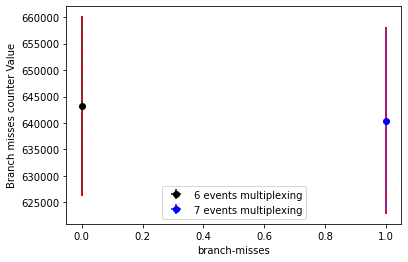

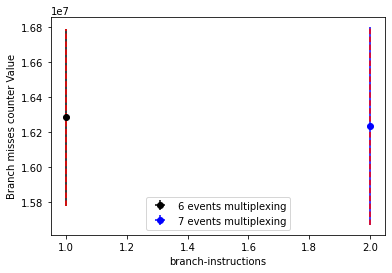

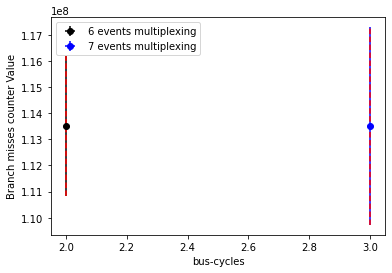

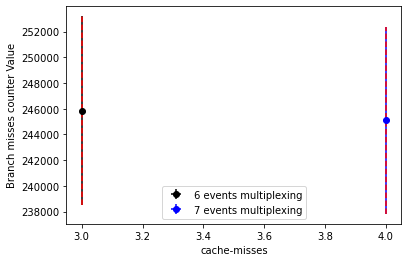

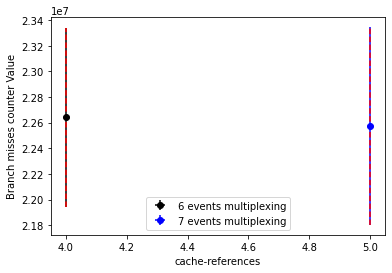

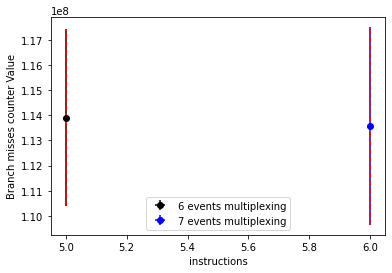

In [165]:
import matplotlib.pyplot as plt

# Generate some sample data
labels = np.array(["branch-misses",
              "branch-instructions",
              "bus-cycles",
              "cache-misses",
              "cache-references",
              "instructions"])
x=np.arange(6)
y1 = np.mean(c1, axis=0)
y_std1 = np.std(c1, axis=0)


y2 = np.mean(c2, axis=0)
y_std2 = np.std(c2, axis=0)    
for i in range(6):
    plt.errorbar(x[i], y1[i], yerr=y_std1[i], fmt='o', color='black', xerr=0,label='6 events multiplexing')
    plt.errorbar(x[i]+1, y2[i], yerr=y_std2[i], fmt='o', color='blue', xerr=0,label='7 events multiplexing')
    plt.plot([x[i], x[i]], [y1[i] - y_std1[i], y1[i] + y_std1[i]], color='red', linestyle='--')
    plt.plot([x[i]+1, x[i]+1], [y2[i] - y_std2[i], y2[i] + y_std2[i]], color='red', linestyle='--')
    plt.xlabel(labels[i])
    plt.ylabel('Branch misses counter Value')
    plt.legend()
    plt.show()
    


